# 范例2. 使用Shap套件，观察图像那些位置对辨识最有帮助

## 步骤1：载入 MNIST 手写阿拉伯数字资料

In [1]:
import tensorflow as tf

# 目前 tensorflow 2.x 版执行 shap 有 bug
tf.compat.v1.disable_v2_behavior()

# 载入 MNIST 手写阿拉伯数字资料
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

Instructions for updating:
non-resource variables are not supported in the long term


## 步骤2：定义 CNN 模型

In [2]:
# 建立模型
from tensorflow.keras import layers
import numpy as np

# 增加一维在最后面
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

# CNN 模型
input_shape=(28, 28, 1)
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

# 设定优化器(optimizer)、损失函数(loss)、效能衡量指标(metrics)的类别
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 步骤3：模型训练

In [3]:
# 模型训练
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2)

# 评分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
47968/48000 [============================>.] - ETA: 0s - loss: 0.2366 - acc: 0.9276

C:\Users\Ariel\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


48000/48000 [==============================] - 22s 465us/sample - loss: 0.2365 - acc: 0.9276 - val_loss: 0.0694 - val_acc: 0.9798
Epoch 2/5
48000/48000 [==============================] - 20s 427us/sample - loss: 0.0868 - acc: 0.9732 - val_loss: 0.0560 - val_acc: 0.9839
Epoch 3/5
48000/48000 [==============================] - 21s 437us/sample - loss: 0.0673 - acc: 0.9788 - val_loss: 0.0454 - val_acc: 0.9876
Epoch 4/5
48000/48000 [==============================] - 21s 435us/sample - loss: 0.0560 - acc: 0.9824 - val_loss: 0.0405 - val_acc: 0.9882
Epoch 5/5
48000/48000 [==============================] - 23s 474us/sample - loss: 0.0502 - acc: 0.9841 - val_loss: 0.0352 - val_acc: 0.9898
loss: 0.0282
acc: 0.9909


## 步骤4：Shap values 计算

In [4]:
import shap
import numpy as np

# 计算 Shap value 的 base
# 目前 tensorflow 2.x 版执行 shap 有 bug
# background = x_train[np.random.choice(x_train_norm.shape[0], 100, replace=False)]
# e = shap.DeepExplainer(model, background)         # shap values 不明显
e = shap.DeepExplainer(model, x_train_norm[:100])

# 测试第 1 笔
shap_values = e.shap_values(x_test_norm[:1])
shap_values

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.


[array([[[[ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00]],
 
         [[ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [ 0.00000000e+00],
          [

In [5]:
np.array(shap_values).shape

(10, 1, 28, 28, 1)

## 步骤5：绘制5笔测试资料的特征归因

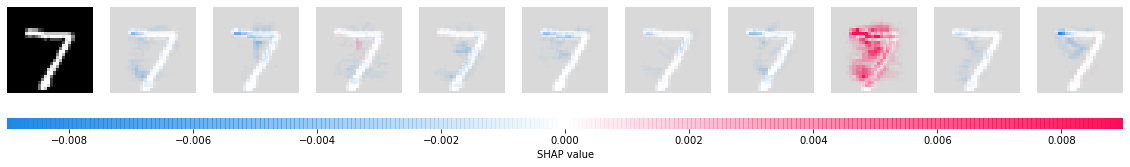

In [6]:
# 绘制特征的归因(feature attribution)
# 一次只能显示一列
shap.image_plot(shap_values, x_test_norm[:1])